### This notebook shows the distribution function evolution during so-called strong Landau damping (a large amplitude electron plasma wave)
#### The initial conditions is a background plasma with a relatively large perturbation (10%) of one wavelength
#### The config is in the `ADEPT` repository

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import yaml
from jax import config
config.update("jax_enable_x64", True)
from adept import ergoExo

MLflow Version: 2.15.0
MLflow Tracking URI: file:///Users/archis/Dev/code/ergodic/adept-notebooks/vlasov/mlruns


In [2]:
with open("configs/strong-landau-damping.yaml", 'r') as stream:
    cfg = yaml.safe_load(stream)

exo = ergoExo()
modules = exo.setup(cfg=cfg)
sim_out, post_processed_output, mlflow_run_id = exo(modules)

f = post_processed_output["dists"]

2024/10/16 20:49:13 INFO mlflow.tracking.fluent: Experiment with name 'nlepw' does not exist. Creating a new experiment.
2024/10/16 20:49:14 WARNING mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics because creating `GPUMonitor` failed with error: `pynvml` is not installed, to log GPU metrics please run `pip install pynvml` to install it..
2024/10/16 20:49:14 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.


Successfully removed /var/folders/tz/l3jmsqhd7tbfz3rjb276f_3r0000gn/T/tmpkjwkkt3k


/Users/archis/Dev/code/ergodic/adept-notebooks/venv/lib/python3.12/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
2024/10/16 20:51:09 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2024/10/16 20:51:09 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


Successfully removed /var/folders/tz/l3jmsqhd7tbfz3rjb276f_3r0000gn/T/tmp043gu664


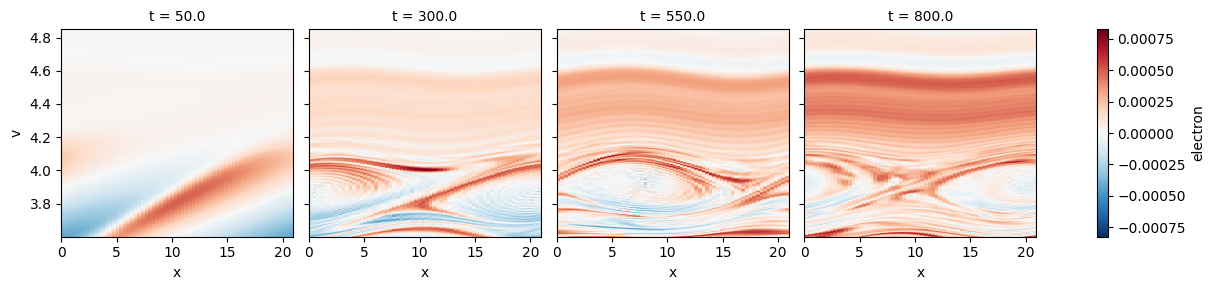

In [3]:
((f["electron"][1::5, :, :]-f["electron"][0])[:,:, 3200:3600].T).plot(col="t", col_wrap=4)
plt.savefig("./sld.png", bbox_inches="tight")

In [4]:
flds = post_processed_output["fields"]

In [5]:
flds

<xarray.Dataset> Size: 3MB
Dimensions:        (t: 1001, x: 64)
Coordinates:
  * t              (t) float32 4kB 0.0 1.0 2.0 3.0 ... 997.0 998.0 999.0 1e+03
  * x              (x) float32 256B 0.1636 0.4908 0.818 ... 20.12 20.45 20.78
Data variables:
    fields--flogf  (t, x) float32 256kB ...
    fields-a       (t, x) float32 256kB ...
    fields-de      (t, x) float32 256kB ...
    fields-e       (t, x) float32 256kB ...
    fields-f^2     (t, x) float32 256kB ...
    fields-n       (t, x) float32 256kB ...
    fields-p       (t, x) float32 256kB ...
    fields-pond    (t, x) float32 256kB ...
    fields-prev_a  (t, x) float32 256kB ...
    fields-q       (t, x) float32 256kB ...
    fields-v       (t, x) float32 256kB ...

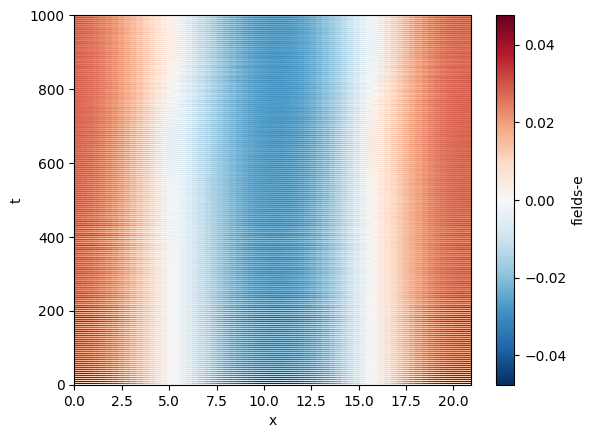

In [6]:
flds["fields-e"].plot()

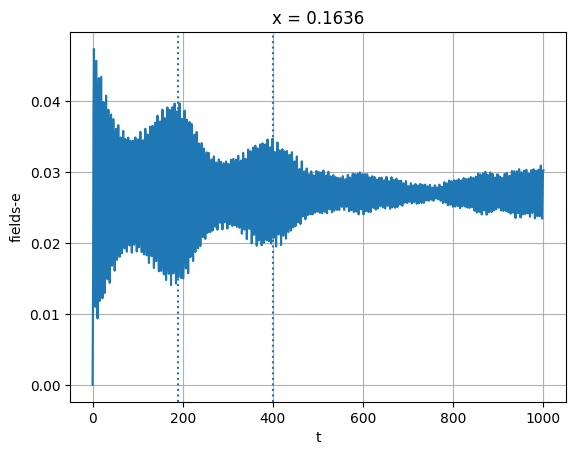

In [7]:
flds["fields-e"][:, 0].plot()
plt.axvline(x=190, linestyle=":")
plt.axvline(x=400, linestyle=":")
plt.grid()

### You can see the bounce period is approximately $200 \omega_p^{-1}$ which is about what we expect $\omega_B = \sqrt{k E}$